In [11]:
# Step 1: Set your hyperparameters
# Number of iterations to train your model
epochs = 25
# Number of samples propagated through the network in each iteration
batch_size = 128
# Max pooling size - calculates the max value for kernel patches
max_pooling_size = 2
# Padding around input
padding = 'same'
# Optimizer algorithm
optimizer = 'adam'

In [12]:
import keras
from keras.datasets import cifar100
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import Adam
from matplotlib import pyplot as plt
import numpy as np

In [13]:
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

In [14]:
# Data preprocessing
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [15]:
# One-hot encode the labels
n_classes = 100
y_train = keras.utils.to_categorical(y_train, n_classes)
y_test = keras.utils.to_categorical(y_test, n_classes)

In [16]:
# Create your model
model = Sequential()
# Stack 1: Input Layer
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)))  # Update input shape
model.add(MaxPooling2D(pool_size=(max_pooling_size, max_pooling_size)))

# Stack 2: Convolution Layer
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(max_pooling_size, max_pooling_size)))

# Stack 3: Convolution Layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(max_pooling_size, max_pooling_size)))

# Stack 4: Dense Layer
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))

# Stack 5: Output Layer
model.add(Dense(n_classes, activation='softmax'))

In [17]:
# Print a summary of the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 2, 2, 128)        

In [18]:
# Step 4: Configure and train your model
# Compile your model
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

Epoch 1/25
352/352 [==============================] - 5s 8ms/step - loss: 4.2252 - accuracy: 0.0541 - val_loss: 3.7940 - val_accuracy: 0.1204
Epoch 2/25
352/352 [==============================] - 2s 6ms/step - loss: 3.7069 - accuracy: 0.1285 - val_loss: 3.4651 - val_accuracy: 0.1788
Epoch 3/25
352/352 [==============================] - 2s 6ms/step - loss: 3.4288 - accuracy: 0.1775 - val_loss: 3.2010 - val_accuracy: 0.2234
Epoch 4/25
352/352 [==============================] - 2s 6ms/step - loss: 3.2437 - accuracy: 0.2090 - val_loss: 3.0478 - val_accuracy: 0.2558
Epoch 5/25
352/352 [==============================] - 2s 6ms/step - loss: 3.0820 - accuracy: 0.2422 - val_loss: 2.9506 - val_accuracy: 0.2718
Epoch 6/25
352/352 [==============================] - 3s 7ms/step - loss: 2.9705 - accuracy: 0.2597 - val_loss: 2.8351 - val_accuracy: 0.2908
Epoch 7/25
352/352 [==============================] - 2s 6ms/step - loss: 2.8743 - accuracy: 0.2808 - val_loss: 2.7485 - val_accuracy: 0.2994
Epoch 

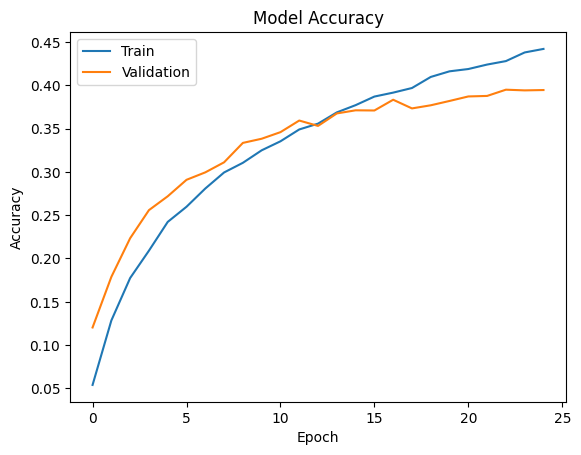

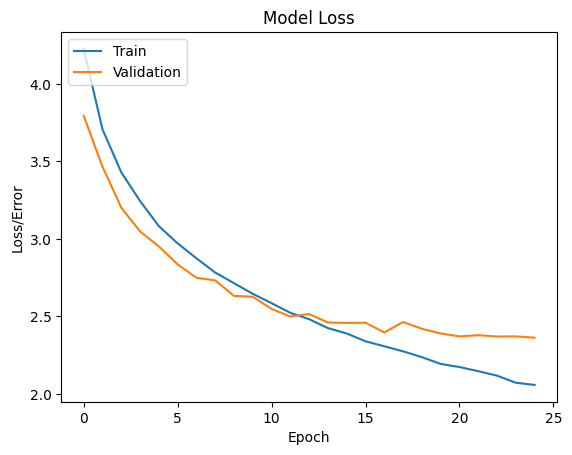

In [19]:
# Fit your model
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1, verbose=1)

# Plotting training history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss/Error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Test Accuracy: 40.74%
1/1 [==============================] - 0s 238ms/step


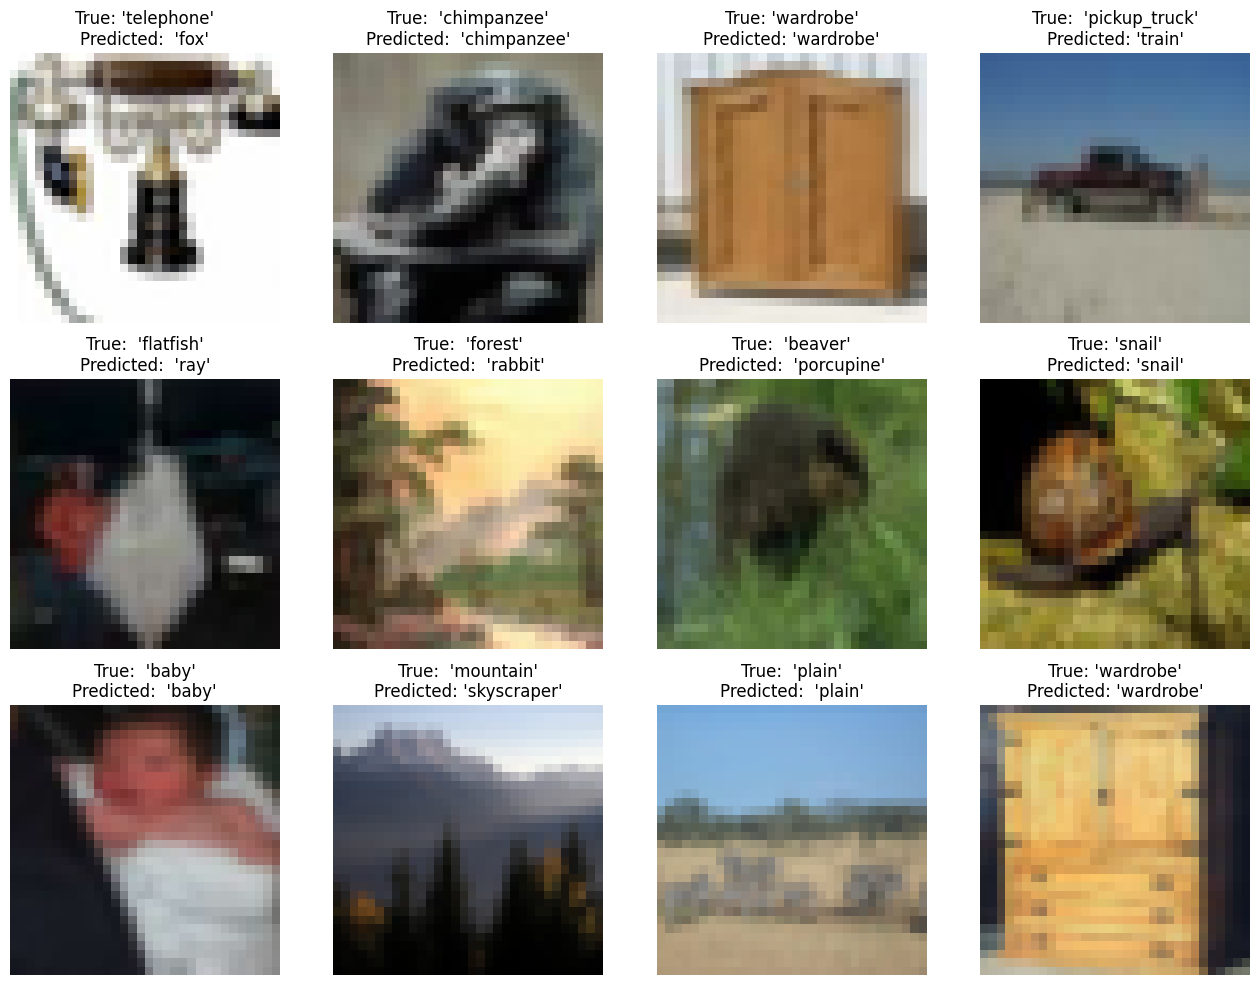

In [20]:
# Step 5: Evaluate your model

# a. Overall summary of the accuracy score on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

# b. Evaluate a random subsample of 12 images and display predictions
import random

# Load labels from the provided file
labels = np.loadtxt("cifar100labels-1.txt", delimiter=',', dtype=str)

# Random 12 indices from test set
sample_indices = random.sample(range(len(x_test)), 12)

# Extract sample images and their true labels
sample_images = x_test[sample_indices]
true_labels = np.argmax(y_test[sample_indices], axis=1)

# Use model.predict to get predictions for the subsample
predicted_labels = np.argmax(model.predict(sample_images), axis=1)

# Display the predictions with images and labels
plt.figure(figsize=(16, 12))
for i in range(len(sample_indices)):
    plt.subplot(3, 4, i+1)
    plt.imshow(sample_images[i])
    plt.title(f"True: {labels[true_labels[i]]}\nPredicted: {labels[predicted_labels[i]]}")
    plt.axis('off')

plt.show()


## Ste6 6: Tune your model

In [21]:
# Create your model
model = Sequential()
# Stack 1: Input Layer
model.add(Conv2D(64, kernel_size=(3, 3), activation='tanh', input_shape=(32, 32, 3)))  # Update input shape
model.add(MaxPooling2D(pool_size=(max_pooling_size, max_pooling_size)))

# Stack 2: Convolution Layer
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(max_pooling_size, max_pooling_size)))

# Stack 3: Convolution Layer
model.add(Conv2D(128, kernel_size=(3, 3), activation='tanh'))
model.add(MaxPooling2D(pool_size=(max_pooling_size, max_pooling_size)))

# Stack 4: Dense Layer
model.add(Flatten())
model.add(Dense(256, activation='tanh'))
model.add(Dropout(0.3))

# Stack 5: Output Layer
model.add(Dense(n_classes, activation='softmax'))

In [22]:
# Print a summary of the model
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 15, 15, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 2, 2, 128)        

In [23]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

Epoch 1/25
352/352 [==============================] - 7s 13ms/step - loss: 3.8029 - accuracy: 0.1234 - val_loss: 3.3191 - val_accuracy: 0.2054
Epoch 2/25
352/352 [==============================] - 4s 11ms/step - loss: 3.0902 - accuracy: 0.2489 - val_loss: 2.9159 - val_accuracy: 0.2864
Epoch 3/25
352/352 [==============================] - 5s 13ms/step - loss: 2.7632 - accuracy: 0.3094 - val_loss: 2.6700 - val_accuracy: 0.3306
Epoch 4/25
352/352 [==============================] - 4s 13ms/step - loss: 2.5641 - accuracy: 0.3506 - val_loss: 2.6139 - val_accuracy: 0.3538
Epoch 5/25
352/352 [==============================] - 3s 10ms/step - loss: 2.3990 - accuracy: 0.3851 - val_loss: 2.4936 - val_accuracy: 0.3746
Epoch 6/25
352/352 [==============================] - 3s 8ms/step - loss: 2.2751 - accuracy: 0.4109 - val_loss: 2.4344 - val_accuracy: 0.3804
Epoch 7/25
352/352 [==============================] - 3s 9ms/step - loss: 2.1559 - accuracy: 0.4359 - val_loss: 2.3920 - val_accuracy: 0.4016
E

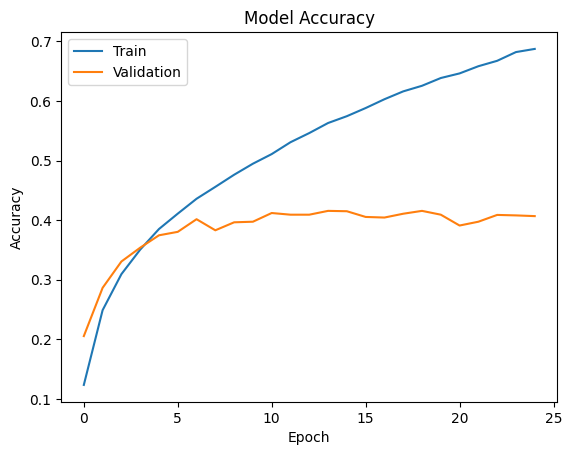

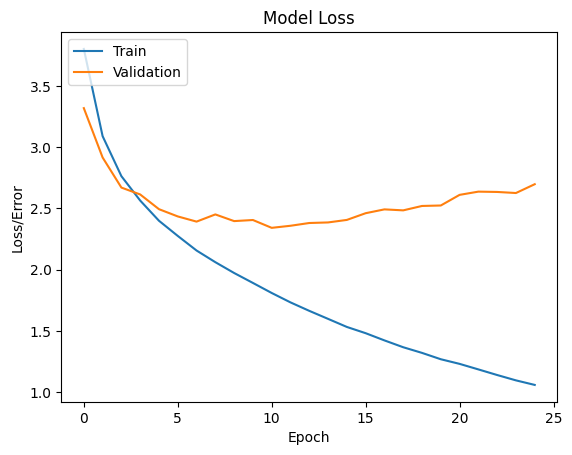

In [24]:
# Fit your model
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1, verbose=1)

# Plotting training history
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss/Error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

Test Accuracy: 41.02%
1/1 [==============================] - 0s 165ms/step


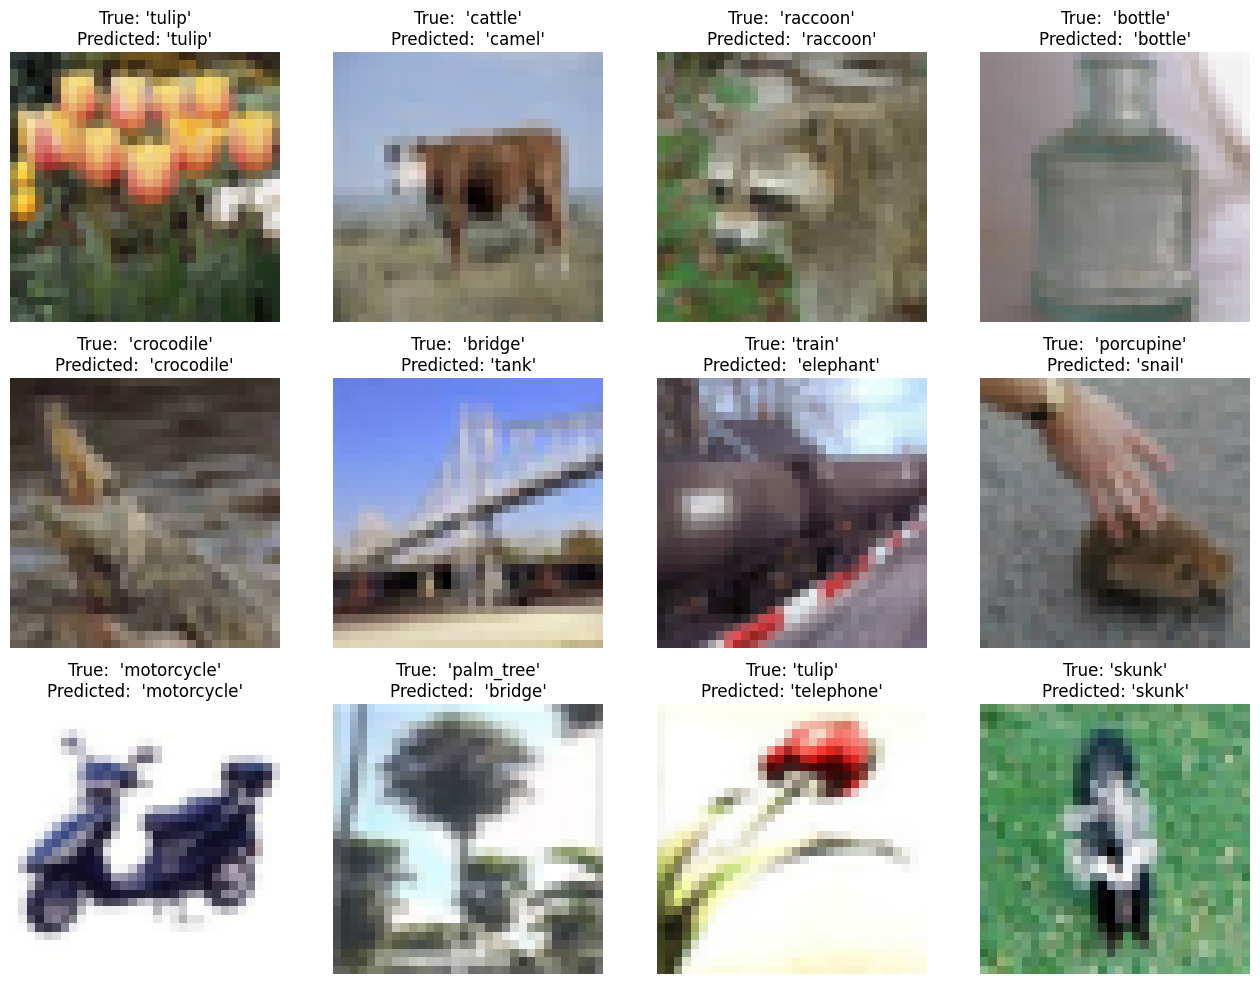

In [25]:
# a. Overall summary of the accuracy score on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

# b. Evaluate a random subsample of 12 images and display predictions
import random

# Load labels from the provided file
labels = np.loadtxt("cifar100labels-1.txt", delimiter=',', dtype=str)

# Random 12 indices from test set
sample_indices = random.sample(range(len(x_test)), 12)

# Extract sample images and their true labels
sample_images = x_test[sample_indices]
true_labels = np.argmax(y_test[sample_indices], axis=1)

# Use model.predict to get predictions for the subsample
predicted_labels = np.argmax(model.predict(sample_images), axis=1)

# Display the predictions with images and labels
plt.figure(figsize=(16, 12))
for i in range(len(sample_indices)):
    plt.subplot(3, 4, i+1)
    plt.imshow(sample_images[i])
    plt.title(f"True: {labels[true_labels[i]]}\nPredicted: {labels[predicted_labels[i]]}")
    plt.axis('off')

plt.show()